In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")

# Load datasets

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Analytics_Vidhya/JOB_A_THON_MAY/train_s3TEQDk.csv")
test = pd.read_csv("/content/drive/MyDrive/Analytics_Vidhya/JOB_A_THON_MAY/test_mSzZ8RL.csv")
ss = pd.read_csv("/content/drive/MyDrive/Analytics_Vidhya/JOB_A_THON_MAY/sample_submission_eyYijxG.csv")

In [ ]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
Target_col ='Is_Lead'
ID = 'ID'
num_cols = ['Age', 'Vintage', 'Avg_Account_Balance']
cat_cols = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

# Data statistics

In [ ]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# Unique Values

In [ ]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

# Null Values

In [ ]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

# Target Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


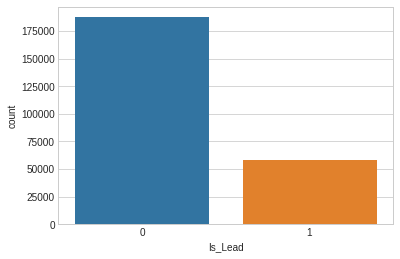

In [ ]:
sns.countplot(train[Target_col])

# Categorical Features

## Univariate Analysis - Pie Chart

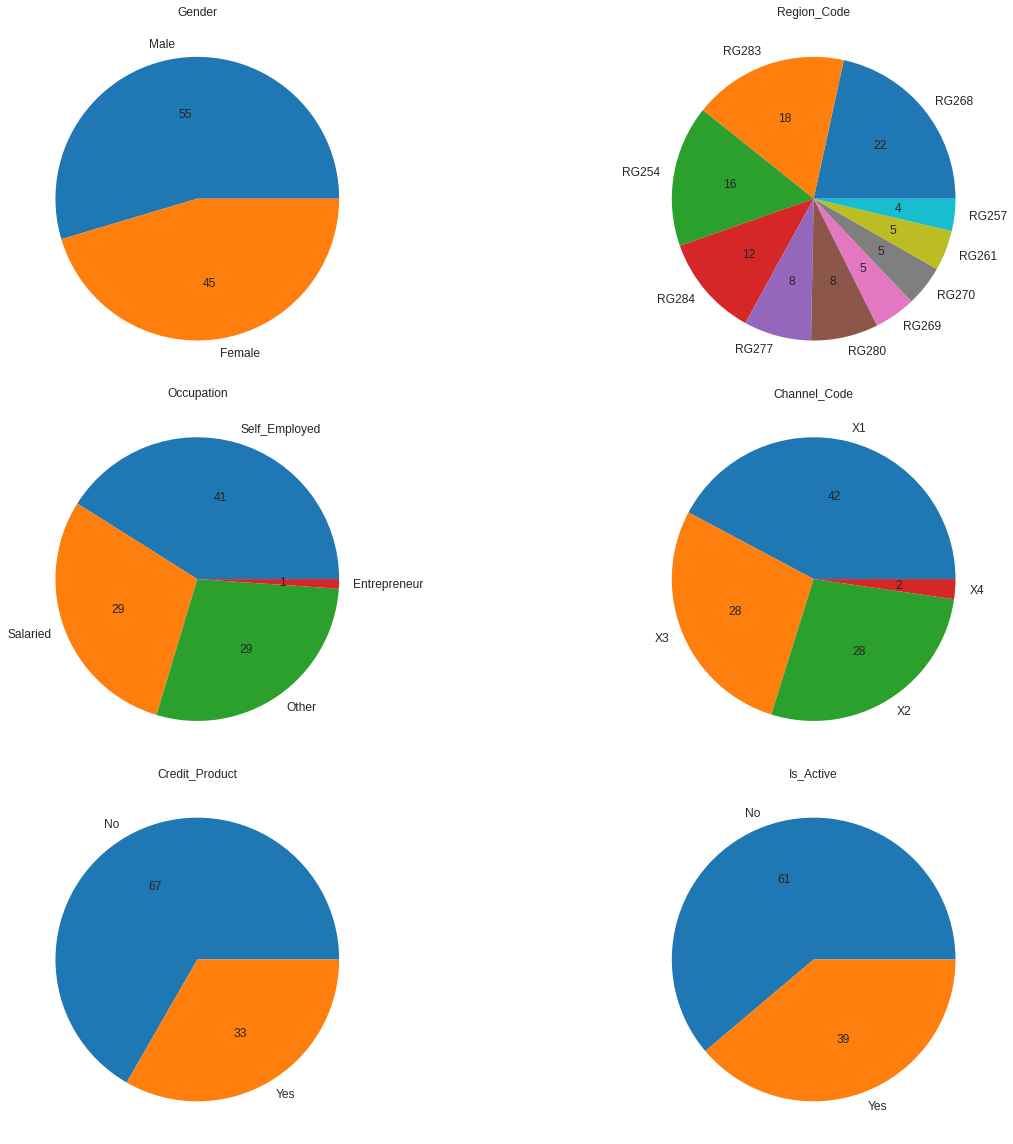

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(20,16))
axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[cat_cols]):
  train[c].value_counts()[:10].plot(kind='pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
  axes[i].set_ylabel('')

plt.tight_layout()

## Univariate Analysis - Bar Chart

> Indented block



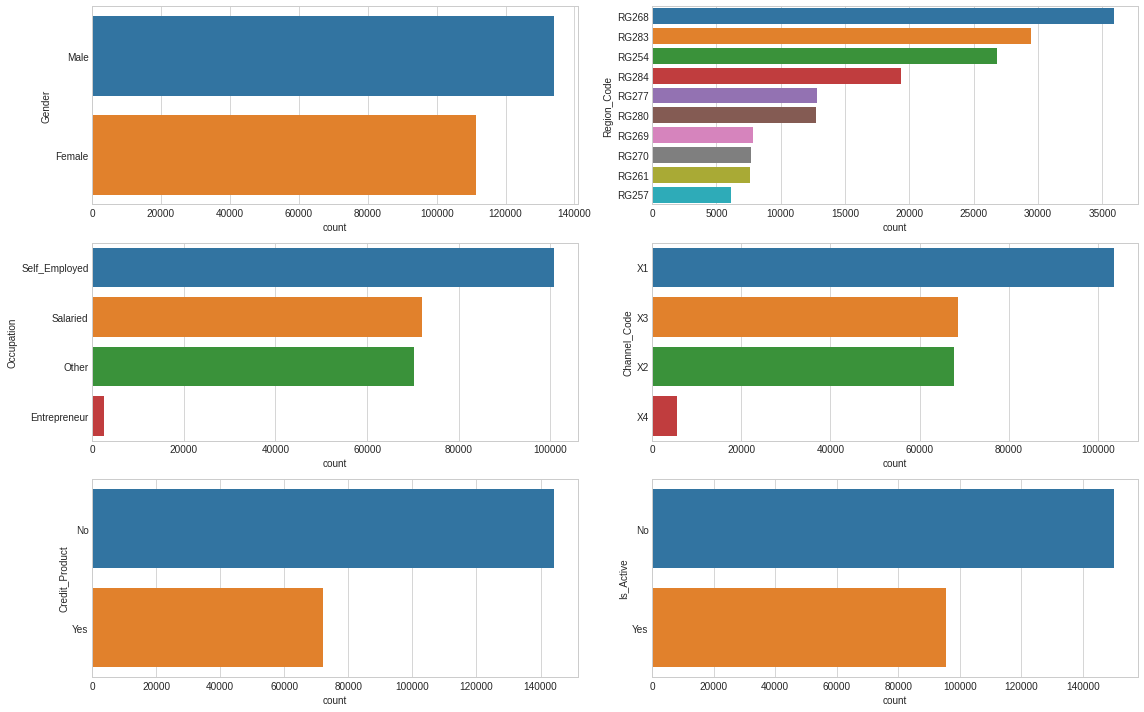

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(16, 10))
axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[cat_cols]):
  sns.countplot(y=c, data=train, ax=axes[i], order=train[c].value_counts().iloc[:10].index)

plt.tight_layout()

## Bivariate Analysis Relationships with Target

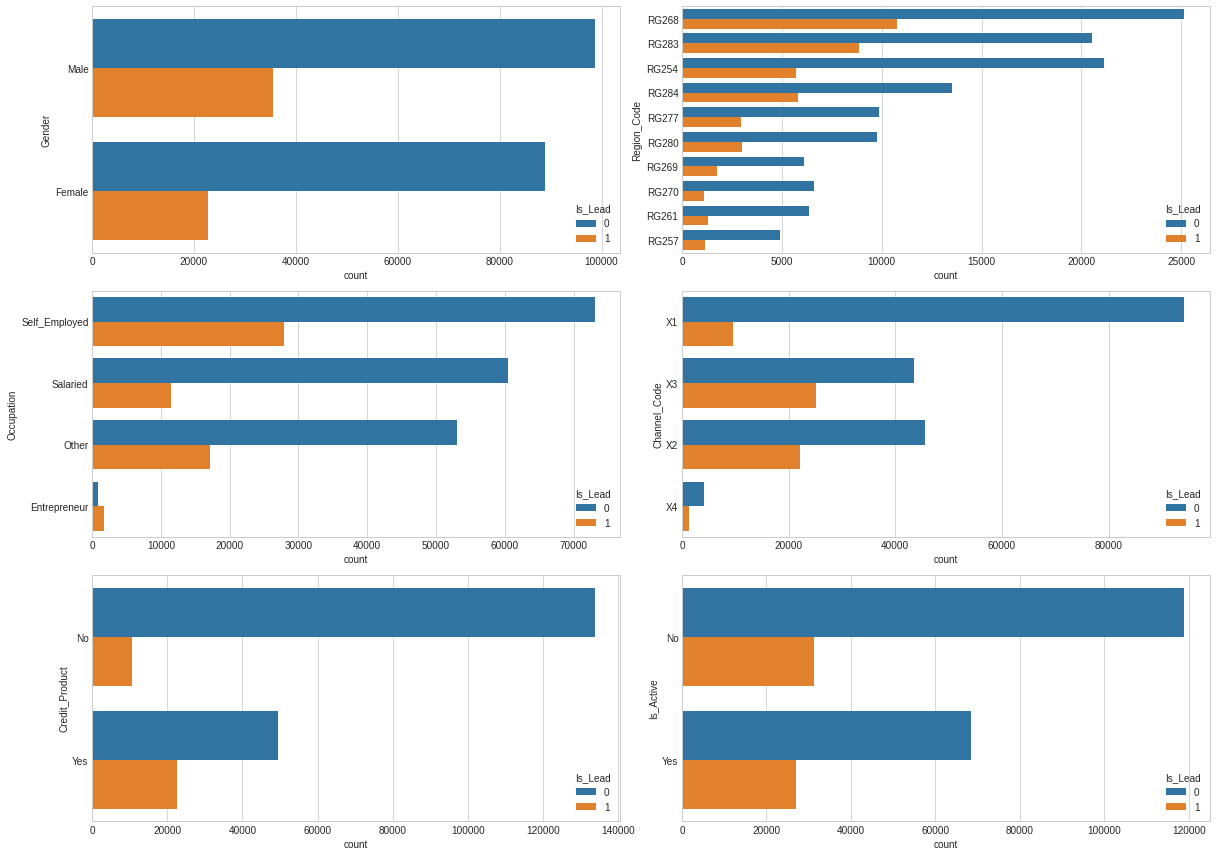

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(17, 12))
axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[cat_cols]):
  sns.countplot(y=c, data=train, ax=axes[i], hue=Target_col, order=train[c].value_counts().iloc[:10].index)

plt.tight_layout()

# Numerical Features

## Univariate Analysis - Boxplots

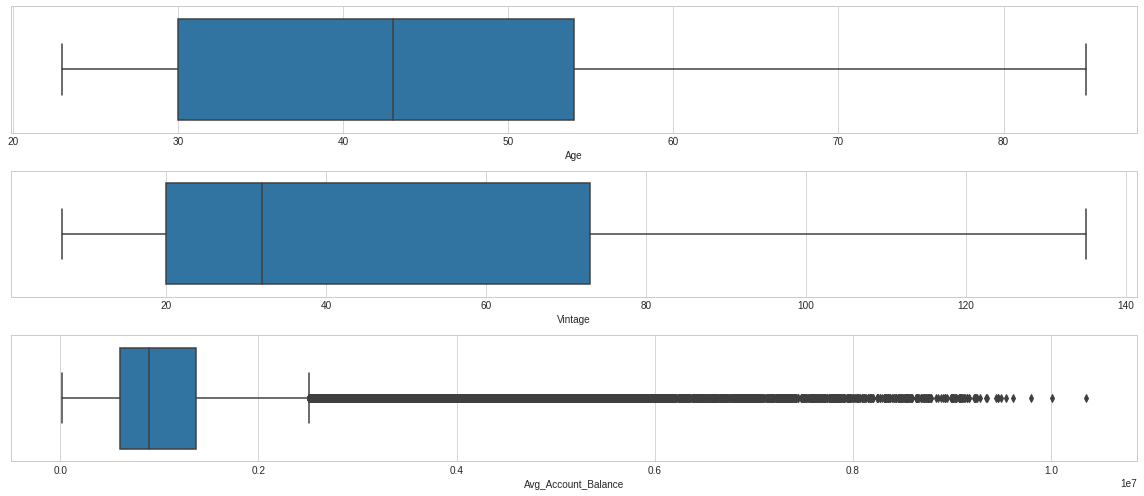

In [ ]:
fig, axes = plt.subplots(3,1,figsize=(16, 7))
#axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[num_cols]):
  sns.boxplot(x=c, data=train, ax=axes[i])

plt.tight_layout()

## Univariate Analysis - Density Plots

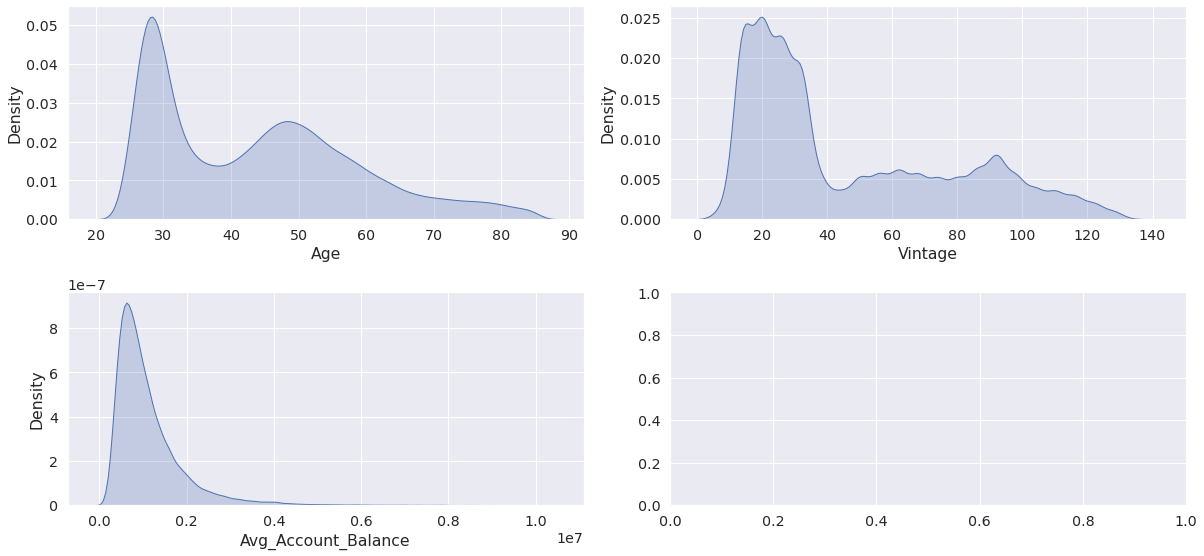

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2,2,figsize=(17, 8))
axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[num_cols]):
  sns.kdeplot(x=c, data=train, ax=axes[i], fill=True)

plt.tight_layout()

## Bivariate Analysis KDE plots - Relationships with Target Variable.

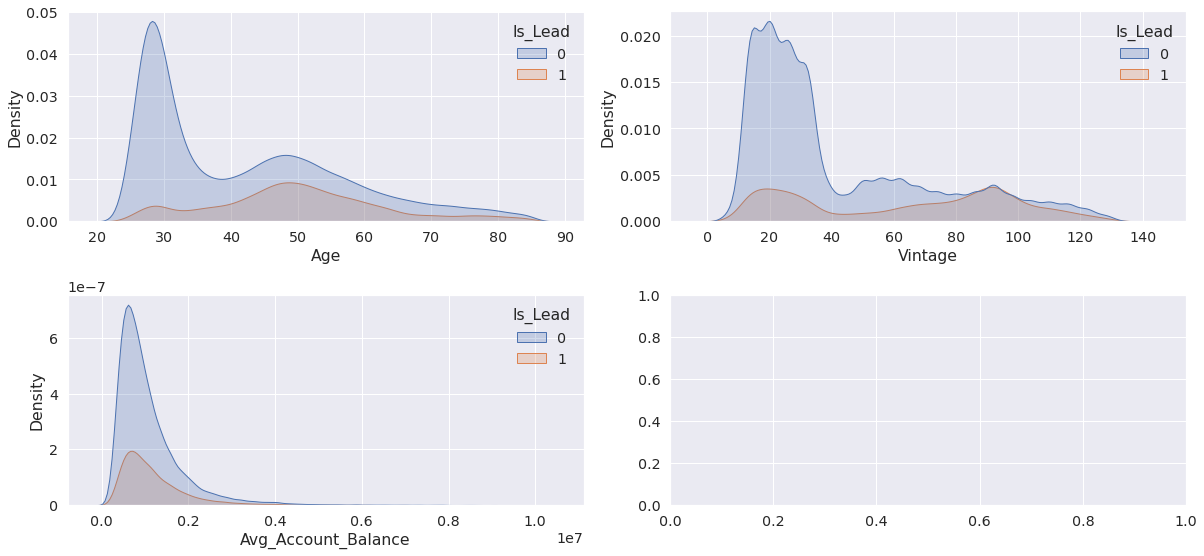

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2,2,figsize=(17, 8))
axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[num_cols]):
  sns.kdeplot(x=c, data=train, ax=axes[i],hue=Target_col, fill=True)
plt.tight_layout()

## Bivariate Analysis Box plots - Relationships with Target Variable.

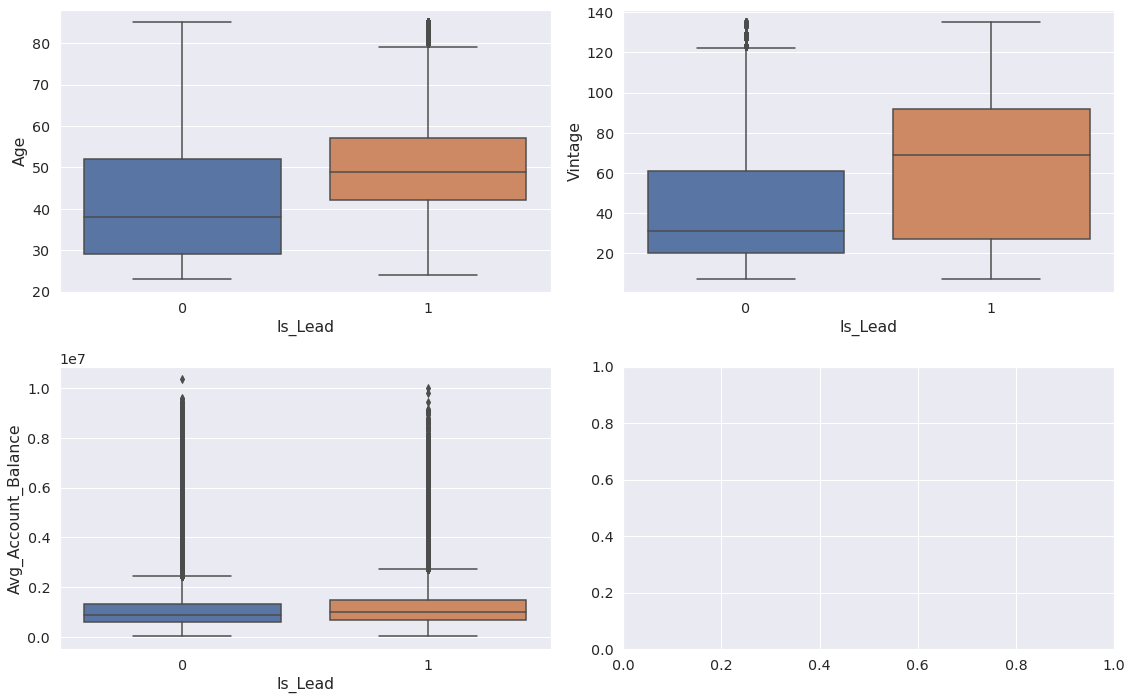

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(16, 10))
axes = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train[num_cols]):
  sns.boxplot(y=c, data=train, ax=axes[i], x=Target_col)

plt.tight_layout()

## Bivariate Analysis - Correlation Heatmaps

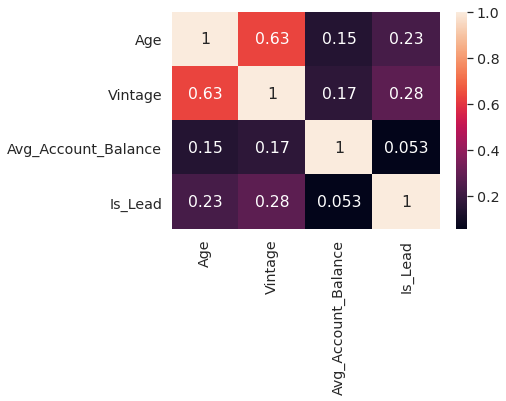

In [ ]:
sns.heatmap(train.corr(method='pearson'), annot=True)

# Import Libraries

In [ ]:
!pip install -q catboost
!pip install -q --upgrade seaborn

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error as mse
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.cluster import KMeans

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Concating train and test datasets.

In [ ]:
df = pd.concat([train, test], axis=0)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0


# Fill Null values

In [ ]:
# Null Values
df.isnull().sum()

ID                     0     
Gender                 0     
Age                    0     
Region_Code            0     
Occupation             0     
Channel_Code           0     
Vintage                0     
Credit_Product         41847 
Avg_Account_Balance    0     
Is_Active              0     
Is_Lead                105312
dtype: int64

In [ ]:
df['Credit_Product'] = df['Credit_Product'].fillna('unknown')

# Encoding categorical columns

In [ ]:
two_cat_col = [c for c in cat_cols if c not in ['Region_Code']]
df['Region_Code_num'] = df['Region_Code'].str.split('2').str[1].astype(int)
df = pd.get_dummies(df, columns=two_cat_col, drop_first=True, dtype=int)
df['Region_Code'] = pd.factorize(df['Region_Code'])[0]

# Log tranformation

In [ ]:
df['Avg_Account_Balance'] = np.log1p(df['Avg_Account_Balance'])

In [ ]:
def get_frequency_features(df, cols):
  df[[c + '_freq' for c in cols]] = df[cols].apply(lambda x: x.map(x.value_counts()))
  return df

In [ ]:
freq_col = ['Age', 'Region_Code', 'Vintage', 'Region_Code_num', 'Avg_Account_Balance']

In [ ]:
df = get_frequency_features(df, freq_col)

# Feature Engineering

In [ ]:
#@title Feature Enginnering { display-mode: "code" }
temp2 = df.groupby(['Avg_Account_Balance']).agg({'Region_Code_num':['sum','count','mean'],
                                           'Vintage':['sum','mean', 'max', 'count'],
                                           'Age':['sum', 'mean', 'max', 'count'],
                                           'Region_Code':['sum', 'mean'],
                                           'Avg_Account_Balance':['sum', 'max', 'mean', 'min', 'count'],
                                           'Gender_Male':['mean', 'sum', 'count'],
                                           'Credit_Product_Yes':['mean', 'sum', 'count'],
                                           'Is_Active_Yes':['mean', 'sum'],
                                           'Occupation_Self_Employed':['mean', 'sum', 'count']
                                          })

temp2.columns = ['_'.join(x) for x in temp2.columns]
df = pd.merge(df,temp2,on=['Avg_Account_Balance'],how='left')
#temp.shape

In [ ]:
df.head()

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Region_Code_num,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Credit_Product_unknown,Is_Active_Yes,Age_freq,Region_Code_freq,Vintage_freq,Region_Code_num_freq,Avg_Account_Balance_freq,Region_Code_num_sum,Region_Code_num_count,Region_Code_num_mean,Vintage_sum,Vintage_mean,Vintage_max,Vintage_count,Age_sum,Age_mean,Age_max,Age_count,Region_Code_sum,Region_Code_mean,Avg_Account_Balance_sum,Avg_Account_Balance_max,Avg_Account_Balance_mean,Avg_Account_Balance_min,Avg_Account_Balance_count,Gender_Male_mean,Gender_Male_sum,Gender_Male_count,Credit_Product_Yes_mean,Credit_Product_Yes_sum,Credit_Product_Yes_count,Is_Active_Yes_mean,Is_Active_Yes_sum,Occupation_Self_Employed_mean,Occupation_Self_Employed_sum,Occupation_Self_Employed_count
0,NNVBBKZB,73,0,43,13.860194,0.0,68,0,1,0,0,0,1,0,0,0,0,1757,51059,2297,51059,2,122,2,61.00,64,32.000000,43,2,99,49.500000,73,2,7,3.500000,27.720388,13.860194,13.860194,13.860194,2,0.000000,0,2,0.000000,0,2,0.50,1,0.00,0,2
1,IDD62UNG,30,1,32,13.274207,0.0,77,0,0,1,0,0,0,0,0,0,0,15684,18422,13600,18422,4,305,4,76.25,85,21.250000,32,4,128,32.000000,38,4,50,12.500000,53.096827,13.274207,13.274207,13.274207,4,0.500000,2,4,0.250000,1,4,0.25,1,0.25,1,4
2,HD3DSEMC,56,0,26,14.210465,0.0,68,0,0,0,1,0,1,0,0,0,1,5988,51059,15707,51059,1,68,1,68.00,26,26.000000,26,1,56,56.000000,56,1,0,0.000000,14.210465,14.210465,14.210465,14.210465,1,0.000000,0,1,0.000000,0,1,1.00,1,1.00,1,1
3,BF3NC7KV,34,2,19,13.061456,0.0,70,1,0,1,0,0,0,0,0,0,0,6165,11160,17457,11160,3,192,3,64.00,49,16.333333,19,3,124,41.333333,62,3,10,3.333333,39.184367,13.061456,13.061456,13.061456,3,0.666667,2,3,0.666667,2,3,0.00,0,0.00,0,3
4,TEASRWXV,30,3,33,13.695361,0.0,8,0,0,1,0,0,0,0,0,0,0,15684,8166,13661,8166,1,8,1,8.00,33,33.000000,33,1,30,30.000000,30,1,3,3.000000,13.695361,13.695361,13.695361,13.695361,1,0.000000,0,1,0.000000,0,1,0.00,0,0.00,0,1


In [ ]:
df.shape

(351037, 51)

In [ ]:
features = [c for c in df.columns if c not in ['ID', Target_col]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Split the dataset into train and test datasets.

In [ ]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in df.columns if c not in ['ID', Target_col]]

In [ ]:
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 7, stratify = train_proc[Target_col])
X_trn, X_val = trn[features], val[features]
y_trn, y_val = trn[Target_col], val[Target_col]
X_test = test_proc[features]

# Models

## Logistics Regression

In [ ]:
clf = LogisticRegression(random_state = 1)
_ = clf.fit(X_trn, y_trn)

In [ ]:
preds_val = clf.predict_proba(X_val)[:,1]

In [ ]:
roc_auc_score(y_val, preds_val)

0.6993978228582602

## Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state = 1)
_ = clf.fit(X_trn, y_trn)
preds_val = clf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, preds_val)

0.7048447510525556

### Hyperparameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hyperparam_combs = {
    'max_depth': [5, 7, 9, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 7, 11, 21, 40],
    'max_features': [0.2, 0.5, 0.7, 0.9, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 2, 1: 1}, {0: 1, 1: 2}, {0: 3, 1: 1}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                        # scoring='roc_auc',
                         random_state=1,
                         n_iter=10)

search = clf.fit(train_proc[features], train_proc[Target_col])
search.best_params_

In [ ]:
optimal_params = {'class_weight' : {0: 1, 1: 1},
 'criterion' : 'gini',
 'bootstrap' : [True, False],
 'max_depth' : 7,
 'max_features': 0.7,
 'max_leaf_nodes': 128,
 'min_samples_split': 5,
 }
clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)
preds_val = clf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, preds_val)

0.8699205515368724

In [ ]:
preds_test = clf.predict_proba(X_test)[:,1]

In [ ]:
preds_test

array([0.04296875, 0.88716177, 0.05336025, ..., 0.05336025, 0.171646  ,
       0.05336025])

In [ ]:
ss[Target_col] = preds_test
ss.to_csv("sol.csv", index=False)

# Random Forest

In [ ]:
clf = RandomForestClassifier()
_ = clf.fit(X_trn,y_trn)
preds_val = clf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, preds_val)

0.8572365695223587

In [ ]:
hyperparam_combs = {
    'max_depth': [5, 7, 9, 11 ],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [5, 7, 11, 21, 40],
    'max_features': [0.5, 0.7, 0.9],
    'max_leaf_nodes': [8, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 2, 1: 1}, {0: 1, 1: 2}]
}

clf = RandomizedSearchCV(RandomForestClassifier(),
                         hyperparam_combs,
                         scoring='roc_auc',
                         random_state=1,
                         n_iter=10)

search = clf.fit(train_proc[features], train_proc[Target_col])
search.best_params_

{'class_weight': {0: 1, 1: 2},
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 0.5,
 'max_leaf_nodes': 128,
 'min_samples_split': 7}

In [ ]:
optimal_params = {'class_weight': {0: 1, 1: 2},
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 0.5,
 'max_leaf_nodes': 128,
 'min_samples_split': 7}
clf = RandomForestClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)
preds_val = clf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, preds_val)

0.8734499752154197

# AdaBoost 

In [ ]:
ada_clf = AdaBoostClassifier()
_ = ada_clf.fit(X_trn, y_trn)
roc_auc_score(y_val, ada_clf.predict_proba(X_val)[:,1])

0.865423560482167

# GradientBoost

In [ ]:
gbc_clf = GradientBoostingClassifier()
_ = gbc_clf.fit(X_trn, y_trn)
roc_auc_score(y_val, gbc_clf.predict_proba(X_val)[:,1])

0.8724990221777181

# K fold

In [ ]:
def run_clf_kfold(clf, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[Target_col])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]
  
    ############# Fitting and Predicting ################
    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = roc_auc_score(y_val, preds_val)
    print(f'roc_auc score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS
    
  oofs_score = roc_auc_score(target, oofs)
  print(f'\n\nroc_auc score for oofs is {oofs_score}')

  return oofs, preds

In [ ]:
target = train[Target_col]

### DecisionTree Classifier k fold

In [ ]:
dt_params = {'class_weight': {0: 2, 1: 1},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.9,
 'max_leaf_nodes': 128,
 'min_samples_split': 64}

clf = DecisionTreeClassifier(**dt_params)
dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------
roc_auc score for validation set is 0.8690761953721963

------------- Fold 2 -------------
roc_auc score for validation set is 0.8707502045045481

------------- Fold 3 -------------
roc_auc score for validation set is 0.870245508521298

------------- Fold 4 -------------
roc_auc score for validation set is 0.8693043050143355

------------- Fold 5 -------------
roc_auc score for validation set is 0.8716547795927635


roc_auc score for oofs is 0.870173705613691


### Random Forest k fold

In [ ]:
rfc_params = {'class_weight': {0: 1, 1: 2},
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 0.5,
 'max_leaf_nodes': 128,
 'min_samples_split': 7}

rfc_clf = RandomForestClassifier(**rfc_params)
rfc_oofs, rfc_preds = run_clf_kfold(rfc_clf, train_proc, test_proc, features)


------------- Fold 1 -------------
roc_auc score for validation set is 0.8716131108138585

------------- Fold 2 -------------
roc_auc score for validation set is 0.8732177397050148

------------- Fold 3 -------------
roc_auc score for validation set is 0.8729743792739211

------------- Fold 4 -------------
roc_auc score for validation set is 0.8734786908892755

------------- Fold 5 -------------
roc_auc score for validation set is 0.8753816231177675


roc_auc score for oofs is 0.8731105117601883


### GradientBoost K Fold

In [ ]:
gbc_params = {'learning_rate': 0.033,
 'n_estimators': 100,
 'max_depth': 7,
 'subsample':1,
 'max_features': 'sqrt',
 'max_leaf_nodes': 16,
 'min_samples_split': 4,
 'random_state':1}

gbc_clf = GradientBoostingClassifier(**gbc_params)
gbc_oofs, gbc_preds = run_clf_kfold(gbc_clf, train_proc, test_proc, features)

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------
roc_auc score for validation set is 0.8715780900278413

------------- Fold 2 -------------
roc_auc score for validation set is 0.8740235015378207

------------- Fold 3 -------------
roc_auc score for validation set is 0.8734523730793152

------------- Fold 4 -------------
roc_auc score for validation set is 0.8736612280065175

------------- Fold 5 -------------
roc_auc score for validation set is 0.8749306129904985


roc_auc score for oofs is 0.8734539939466691


In [ ]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  folds = StratifiedKFold(n_splits = N_SPLITS)
  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[Target_col])):
    print(f'\n------------- Fold {fold_ + 1} -------------')
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]
    X_test = test[features]
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = roc_auc_score(y_val, preds_val)
    print(f'\nroc_auc score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS

  oofs_score = roc_auc_score(target, oofs)
  print(f'\n\nroc_auc score for oofs is {oofs_score}')

  return oofs, preds

In [ ]:
clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.03,
                        metric = 'auc',
                        objective = 'binary',
                        colsample_bytree = 0.7)

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.872156
[400]	valid_0's auc: 0.871969
Early stopping, best iteration is:
[246]	valid_0's auc: 0.872429

roc_auc score for validation set is 0.8724286164069142

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.873307
[400]	valid_0's auc: 0.873581
[600]	valid_0's auc: 0.873565
Early stopping, best iteration is:
[515]	valid_0's auc: 0.873682

roc_auc score for validation set is 0.8736819939539442

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.873608
[400]	valid_0's auc: 0.873106
Early stopping, best iteration is:
[215]	valid_0's auc: 0.873686

roc_auc score for validation set is 0.8736856763515612

------------- Fold 4 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.874161
[

<Figure size 1440x432 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

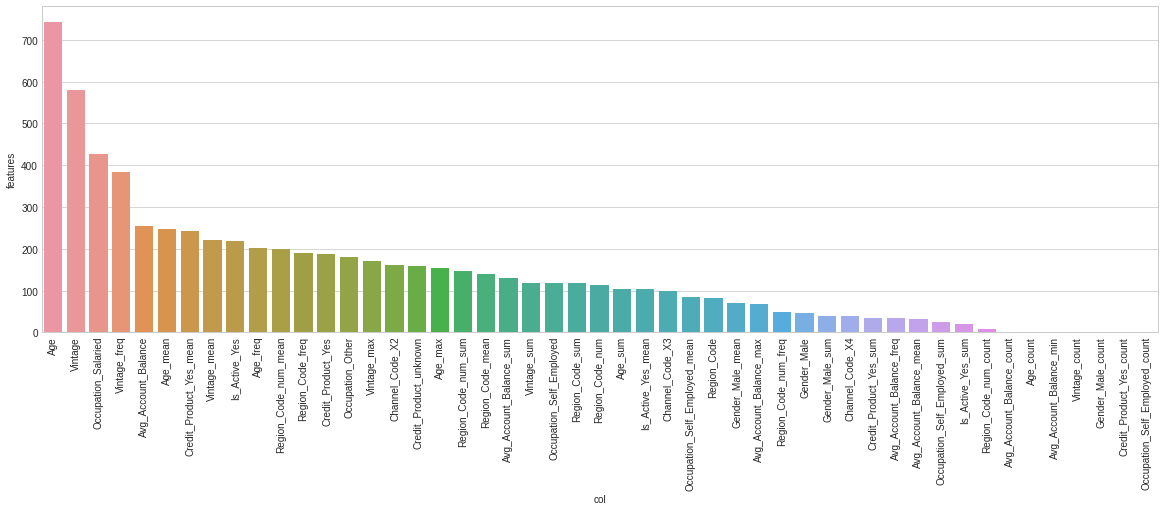

In [ ]:
feat_df = pd.DataFrame({"col":features,"features":clf.feature_importances_}).sort_values('features', ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x="col", y='features', data=feat_df)
plt.xticks(rotation=90)

In [ ]:
ss[Target_col] = (lgb_preds+x)/2
ss.to_csv("3_ens_sol.csv", index=False)

In [ ]:
lgb_preds

array([0.04928005, 0.84094229, 0.05262139, ..., 0.0654191 , 0.19506404,
       0.0490191 ])

In [ ]:
lgb_preds

array([0.05147161, 0.84639245, 0.05331688, ..., 0.06477748, 0.20063824,
       0.04915159])

## CatBoost

In [ ]:
clf = CatBoostClassifier(n_estimators = 10000,
                         eval_metric = 'AUC',
                         loss_function = 'Logloss',
                         learning_rate = 0.03,
                         #rsm = 0.25,
                         l2_leaf_reg = 50,
                         depth = 7,
                         od_type = 'Iter',
                         #random_seed = 740950,
                         border_count = 32,
                         random_state = 1,
                         task_type = 'GPU')
fit_params = {'verbose': 500, 'early_stopping_rounds': 500}
cb_oofs, cb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)


------------- Fold 1 -------------
0:	learn: 0.8647732	test: 0.8627231	best: 0.8627231 (0)	total: 20ms	remaining: 3m 20s
500:	learn: 0.8814182	test: 0.8722100	best: 0.8722471 (478)	total: 5.93s	remaining: 1m 52s
1000:	learn: 0.8875602	test: 0.8721007	best: 0.8723169 (668)	total: 11.7s	remaining: 1m 45s
bestTest = 0.8723168969
bestIteration = 668
Shrink model to first 669 iterations.

roc_auc score for validation set is 0.872316928154592

------------- Fold 2 -------------
0:	learn: 0.8650093	test: 0.8644743	best: 0.8644743 (0)	total: 11.9ms	remaining: 1m 59s
500:	learn: 0.8808911	test: 0.8736882	best: 0.8738123 (342)	total: 5.69s	remaining: 1m 47s
1000:	learn: 0.8871791	test: 0.8738223	best: 0.8739284 (901)	total: 11.5s	remaining: 1m 43s
bestTest = 0.8739284277
bestIteration = 901
Shrink model to first 902 iterations.

roc_auc score for validation set is 0.873928511317096

------------- Fold 3 -------------
0:	learn: 0.8660008	test: 0.8647940	best: 0.8647940 (0)	total: 11.9ms	remainin

In [ ]:
ss[Target_col] = cb_preds
ss.to_csv("cb_sol.csv", index=False)

In [ ]:
cb_preds

array([0.06256727, 0.86880266, 0.0531592 , ..., 0.05513984, 0.21670094,
       0.05057454])

In [ ]:
cb_preds

array([0.04576648, 0.89303955, 0.05369878, ..., 0.05906505, 0.23246243,
       0.0516119 ])

<Figure size 1440x288 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

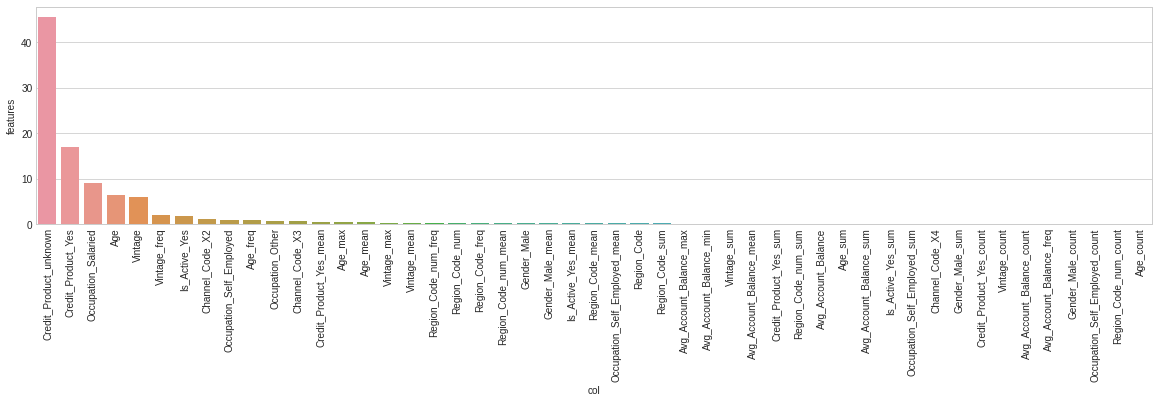

In [ ]:
feat_df = pd.DataFrame({"col":features,"features":clf.feature_importances_}).sort_values(by='features', ascending=False)
plt.figure(figsize=(20,4))
sns.barplot(x="col", y='features', data=feat_df)
plt.xticks(rotation=90)

## XGBoost

In [ ]:
clf = XGBClassifier(n_estimators = 10000,
                    max_depth = 7,
                    learning_rate = 0.05,
                    colsample_bytree = 0.7,
                    random_state=1,
                    tree_method = 'gpu_hist',
                    objective = 'binary:logistic', 
                    eval_metric = 'auc')

fit_params = {'verbose': 250, 'early_stopping_rounds': 250}
xgb_oofs, xgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)


------------- Fold 1 -------------
[0]	validation_0-auc:0.866251
Will train until validation_0-auc hasn't improved in 250 rounds.
[250]	validation_0-auc:0.872108
Stopping. Best iteration:
[149]	validation_0-auc:0.872407


roc_auc score for validation set is 0.8724068657161737

------------- Fold 2 -------------
[0]	validation_0-auc:0.866852
Will train until validation_0-auc hasn't improved in 250 rounds.
[250]	validation_0-auc:0.87377
Stopping. Best iteration:
[146]	validation_0-auc:0.874021


roc_auc score for validation set is 0.8740211834473715

------------- Fold 3 -------------
[0]	validation_0-auc:0.867572
Will train until validation_0-auc hasn't improved in 250 rounds.
[250]	validation_0-auc:0.872618
Stopping. Best iteration:
[129]	validation_0-auc:0.873611


roc_auc score for validation set is 0.8736106185936761

------------- Fold 4 -------------
[0]	validation_0-auc:0.867507
Will train until validation_0-auc hasn't improved in 250 rounds.
[250]	validation_0-auc:0.87323
Stopp

In [ ]:
xgb_preds

array([0.03954465, 0.86795413, 0.06323001, ..., 0.08536586, 0.2321596 ,
       0.05215967])

<Figure size 1440x288 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

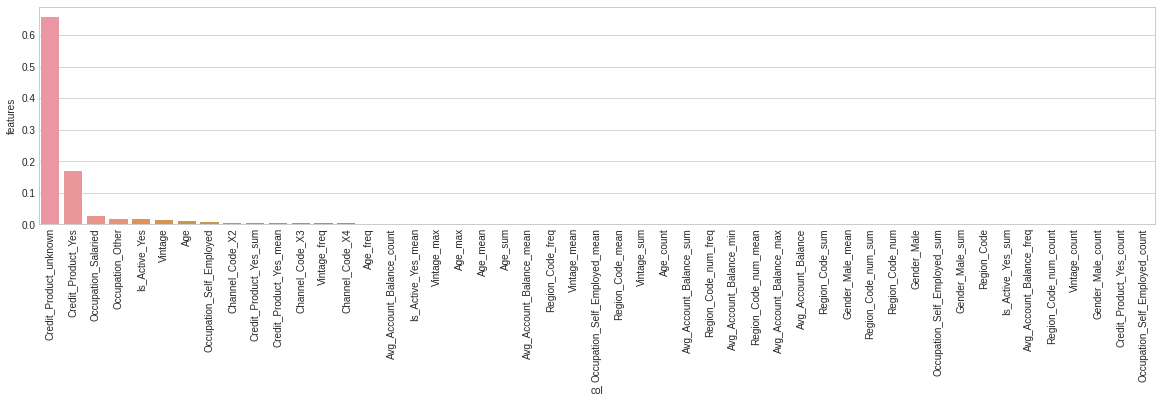

In [ ]:
feat_df = pd.DataFrame({"col":features,"features":clf.feature_importances_}).sort_values('features', ascending=False)
plt.figure(figsize=(20,4))
sns.barplot(x="col", y='features', data=feat_df)
plt.xticks(rotation=90)

In [ ]:
roc_auc_score(target, lgb_oofs*0.45 + cb_oofs*0.35 + xgb_oofs*.2)

0.8740505608951311

In [ ]:
lgb_preds*0.45 + cb_preds*0.35 + xgb_preds*.2

array([0.0532087 , 0.85832815, 0.05362085, ..., 0.06161767, 0.20695926,
       0.04952051])

In [ ]:
ss[Target_col] = 
ss.to_csv("1_ens_stack.csv", index=False)

# Stack model

In [ ]:
train_new = train[['ID', Target_col]]
test_new = test[['ID']]

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['cb'] = cb_oofs
test_new['cb'] = cb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

features = [c for c in train_new.columns if c not in ['ID', Target_col]]

In [ ]:
st_clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.03,
                        metric = 'auc',
                        colsample_bytree = 0.7)
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
st_oofs, st_preds = run_gradient_boosting(st_clf, fit_params, train_new, test_new, features)


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.872463
Early stopping, best iteration is:
[77]	valid_0's auc: 0.872749

roc_auc score for validation set is 0.8727489556830901

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.874109
[400]	valid_0's auc: 0.873835
Early stopping, best iteration is:
[239]	valid_0's auc: 0.874149

roc_auc score for validation set is 0.8741491795689795

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.873213
Early stopping, best iteration is:
[26]	valid_0's auc: 0.873764

roc_auc score for validation set is 0.8737643494761147

------------- Fold 4 -------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.873454
Early stopping, best iteration is:
[8]	valid_0's auc: 0.874307

roc_auc score for validation 

In [ ]:
ss[Target_col] = (y+x1)/2
ss.to_csv("13_stack.csv", index=False)

In [ ]:
x1 = pd.read_csv("/content/6_ens_stack.csv")[Target_col]
x2 = pd.read_csv("/content/11_ens_stack.csv")[Target_col]
x3 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_sol3.csv")[Target_col]
x4 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_most_three.csv")[Target_col]
x5 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_ens_stack.csv")[Target_col]
x6 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_Average1.csv")[Target_col]
x7 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_Average.csv")[Target_col]
x8 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_8_ens_stack.csv")[Target_col]
x9 = pd.read_csv("/content/1043_1ffb70a7-55d1-4f60-937a-a863fe519fb3_us_2_ens_stack.csv")[Target_col]
x10 = pd.read_csv("/content/9_ens_stack.csv")[Target_col]

In [ ]:
y = np.array(x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)/10
y

array([0.06275875, 0.8220656 , 0.06680605, ..., 0.07683271, 0.22208893,
       0.06771628])

In [ ]:
np.array(x1)

array([0.07529466, 0.78086256, 0.07875613, ..., 0.0875535 , 0.22396889,
       0.0795484 ])

In [ ]:
(y+x1)/2

0         0.069027
1         0.801464
2         0.072781
3         0.044443
4         0.044538
            ...   
105307    0.916239
105308    0.552069
105309    0.082193
105310    0.223029
105311    0.073632
Name: Is_Lead, Length: 105312, dtype: float64